In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


**Importing The Packages**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

**Loading The Dataset**

In [3]:
hab_data = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv")

**Printing The First 5 Rows**

In [4]:
hab_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
hab_data.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


**Data Points and Data Features**

In [6]:
print (hab_data.shape)

(305, 4)


In [7]:
hab_data.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Adding headers to columns**

In [8]:
hab_data.columns = ["Age","Year","Axillary nodes","Survival status"]
print (hab_data.columns)

Index(['Age', 'Year', 'Axillary nodes', 'Survival status'], dtype='object')


**Printing the first 5 rows with their column headers**

In [9]:
hab_data.head()

,Age,Year,Axillary nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**A check on survival of patients and deaths of patients within 5 years and more**

In [10]:
hab_data["Survival status"].value_counts()

1    224
2     81
Name: Survival status, dtype: int64

In [11]:
print(hab_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Year             305 non-null    int64
 2   Axillary nodes   305 non-null    int64
 3   Survival status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


***Observation***

**1. Imbalanced Dataset**

**2. It can be seen that data is imbalanced as within 5 years and more 224 survived and 81 died**

**Objective here is to predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes**

**Univariate Analysis**

**PDF**

**Histogram**

**Based On Year**

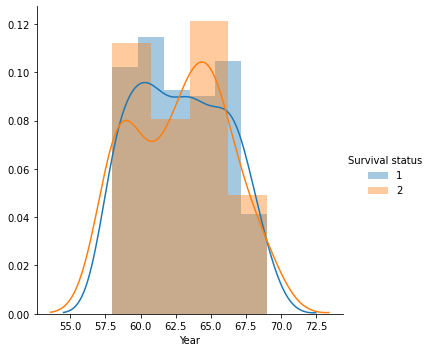

In [12]:
sns.FacetGrid(hab_data, hue="Survival status", height=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.show();

**Based On Age**

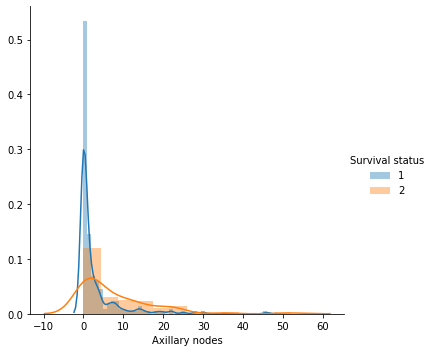

In [13]:
sns.FacetGrid(hab_data, hue="Survival status", height=5) \
   .map(sns.distplot, "Axillary nodes") \
   .add_legend();
plt.show();

**CDF**

**Here it will be divided into two labels**

**1-Alive**

**2-Dead**

In [14]:
alive=hab_data.loc[hab_data["Survival status"]==1]
dead=hab_data.loc[hab_data["Survival status"]==2]

In [15]:
hab_data.head()

,Age,Year,Axillary nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Histogram for Alive Ones**

[0.66517857 0.125      0.04464286 0.02678571 0.02232143 0.03125
 0.00892857 0.00892857 0.00446429 0.01785714 0.00446429 0.00446429
 0.00446429 0.00446429 0.00892857 0.         0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00446429]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]


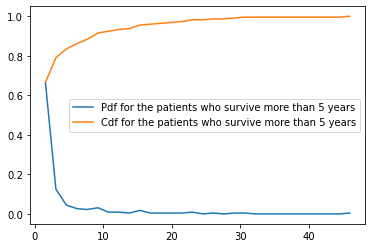

In [16]:
counts, bin_edges = np.histogram(alive['Axillary nodes'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years','Cdf for the patients who survive more than 5 years'])
plt.show()

**Histogram for Dead Ones**

[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.         0.01234568]
[ 0.          1.73333333  3.46666667  5.2         6.93333333  8.66666667
 10.4        12.13333333 13.86666667 15.6        17.33333333 19.06666667
 20.8        22.53333333 24.26666667 26.         27.73333333 29.46666667
 31.2        32.93333333 34.66666667 36.4        38.13333333 39.86666667
 41.6        43.33333333 45.06666667 46.8        48.53333333 50.26666667
 52.        ]


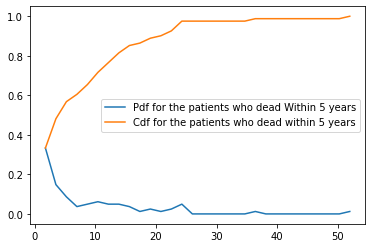

In [17]:
counts, bin_edges = np.histogram(dead['Axillary nodes'], bins=30, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years','Cdf for the patients who dead within 5 years'])
plt.show()

**Just some stats which makes us clear aboout the alive and dead one in 5 years**

***Mean, Variance And Standard Deviaton*****

In [18]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
alive.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,Age,Year,Axillary nodes,Survival status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [19]:
print("Summary Statistics of Patients who are dead within 5 years:")
dead.describe()

Summary Statistics of Patients who are dead within 5 years:


,Age,Year,Axillary nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations:

    From both the tables we can observe that almost for all the features the statistics are similar except for Axillary nodes.

    The auxillary nodes mean(average) is more for people who died within 5 years than people who live more than 5 years

    From the observation of Cdfs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years.

**Box Plot and Whiskers**

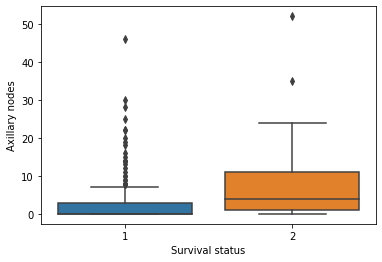

In [20]:
sns.boxplot(x='Survival status',y='Axillary nodes', data=hab_data)
plt.show()

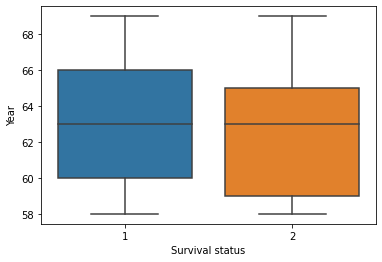

In [21]:
sns.boxplot(x='Survival status',y='Year', data=hab_data)
plt.show()

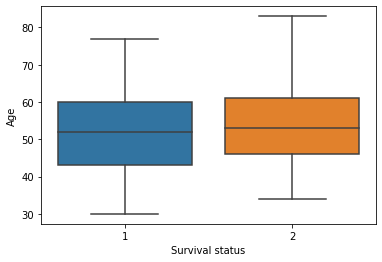

In [22]:
sns.boxplot(x='Survival status',y='Age', data=hab_data)
plt.show()

**Violin Plots**

***In this plot mainly data are fatter and sparser ones thinner***

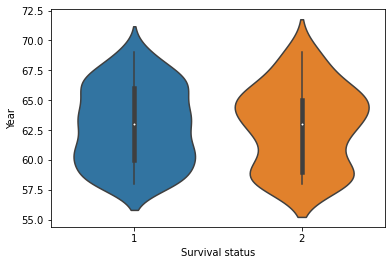

In [23]:
sns.violinplot(x='Survival status',y='Year', data=hab_data,height=8)
plt.show()

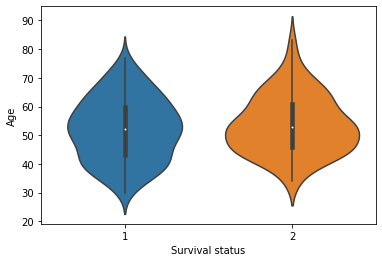

In [24]:
sns.violinplot(x='Survival status',y='Age', data=hab_data,height=8)
plt.show()

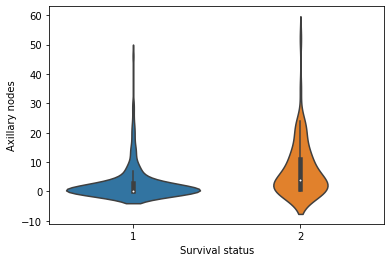

In [25]:
sns.violinplot(x='Survival status',y='Axillary nodes', data=hab_data,height=8)
plt.show()

****
Observation:

    From box,violin plots we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

****

Bi Variate Analysis

**Scatter Plot**

***Plotting a plain plot of auxiliary nodes and age***

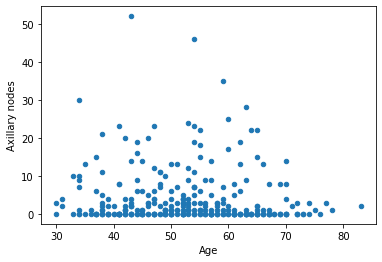

In [26]:
hab_data.plot(kind='scatter', x='Age', y='Axillary nodes') ;
plt.show()

***Plotting the scatter plot with whitegrid and keeping the height as 6***

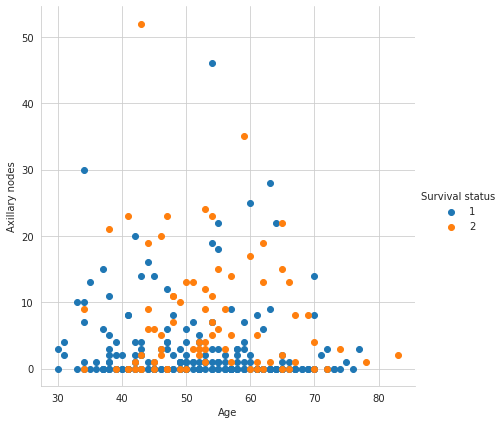

In [27]:
sns.set_style("whitegrid");
sns.FacetGrid(hab_data, hue="Survival status", height=6) \
   .map(plt.scatter, "Age", "Axillary nodes") \
   .add_legend();
plt.show();

**
Observation:

    It seems most of the patients have 0 Auxillary nodes detected.

**

**Multivariate Analysis**

**Pair Plot**

**In this plot every diagonal elements is PDF for each feature**

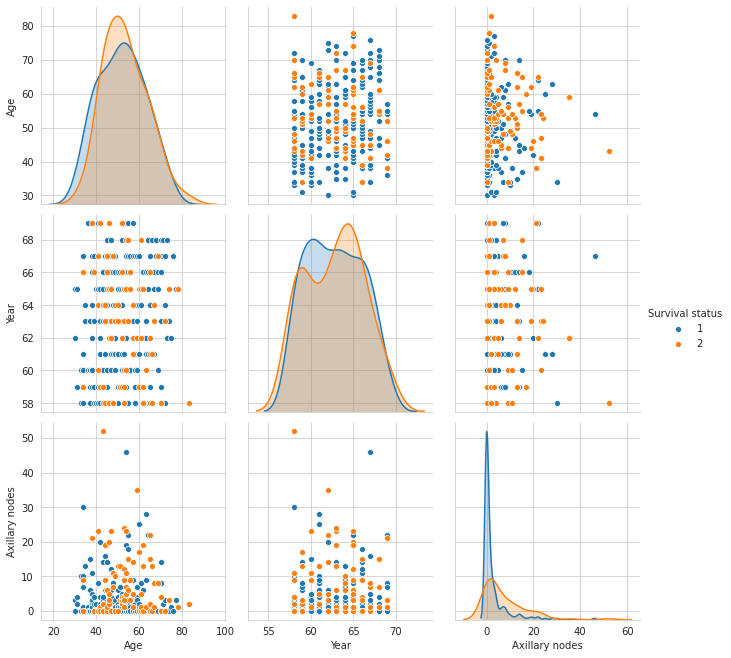

In [28]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab_data, hue="Survival status",
             vars=['Age','Year','Axillary nodes'], height=3)
plt.show()

**In this we aren't able to distinguish**

**Contors Plots**

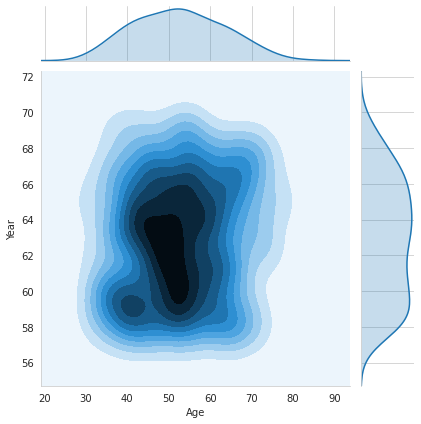

In [29]:
sns.jointplot(x="Age", y="Year", data=hab_data, kind="kde");
plt.show();

**Parallel Coordinates**

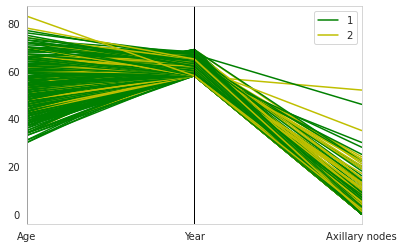

In [30]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(hab_data, "Survival status",color=['g','y'])

**
Conclusin through observations

    No of person who posess high no of axillary nodes indicates that they have high probablity of Not surviving.

    Axillary nodes is most important feature/attribute to predict the survival status of person.

    The person with 0 axillary node is most likely to be survive.

    The least usefull attribute to predict the survival status of person is 'year of operation'

    Most of the persons who performed surgery were between 42-60 years of age

    The majority of the surgeries were performed between 1960 - 1966.

**

**From the univariate, bivarite analysis it is clear that there are overlapping occurs in all analysis.**

**Through bi-variate analysis we can observe that no two specific combination of features are useful in classification.**

**Since overlapping occurs in all the features age, year and the nodes it is clear that, one feature is dependent on all others and vice-versa.**

**So all the features are must needed for the classification of the survival status.**